In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup as bs
import requests as re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&as-backfill=on&page=1'

In [3]:
response = re.get(url)
print(response)

<Response [200]>


In [4]:
flip = bs(response.text, 'html.parser')
print(flip)

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.e84a00.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><meta content="noodp" name="robots"/><link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x

# Product and brand name


In [5]:
#<div class="_4rR01T">Lenovo Intel Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 81X800J3IN | 81X800LGIN Thin and Lig...</div>
r1 = flip.find('div', {'class':'_4rR01T'})
print(r1.text)                                      ##product
print(r1.text.split()[0])                           ##brand

Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14ITL05 Thin and Light Laptop
Lenovo


# product review, rating

In [6]:
#div class="gUuXy-">
#<span id="productRating_LSTCOMGBNFUTNYFZRJQFAMIHE_COMGBNFUTNYFZRJQ_" class="_1lRcqv">
#<div class="_3LWZlK">4.3<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"></div></span><span class="_2_R_DZ"><span><span>449 Ratings&nbsp;</span><span class="_13vcmD">&amp;</span><span>&nbsp;38 Reviews</span></span></span></div>
r2 = flip.find('div',{'class':'gUuXy-'})
print(r2.text.split())   
print(r2.text.split()[3])                       # number of review
r2 = flip.find('div',{'class':'_3LWZlK'})
print(r2.text)                                  # starreview
r3 = flip.find('span',{'class':'_2_R_DZ'})     
print(r3.text.split()[0])                       # number of rating

['4.2870', 'Ratings', '&', '66', 'Reviews']
66
4.2
870


# product price related details

In [7]:
#<div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹39,650</div>
#<div class="_3I9_wc _27UcVY">₹59,890</div>
#<div class="_3Ay6Sb"><span>33% off</span></div></div>
r4 = flip.find('div',{'class':'_30jeq3 _1_WHN1'}) 
print(r4.text)                                             #dis_price
r5 = flip.find('div',{'class':'_3I9_wc _27UcVY'})       
print(r5.text)                                             #act_price
r6 = flip.find('div',{'class':'_3Ay6Sb'})
print(r6.text)                                             # discount%

₹33,890
₹60,890
44% off


## Product Details

In [8]:
p = flip.find('ul',{'class':'_1xgFaf'})
print(p.li.text)                                                              # processor
print(p.li.next_sibling.text.split()[0])                                      # RAM_In_GB
print(p.li.next_sibling.next_sibling.text)                                    # operating system   
print(p.li.next_sibling.next_sibling.next_sibling.text)                       #SSD_in_GB
print(p.li.next_sibling.next_sibling.next_sibling.next_sibling.text)          #display size

Intel Core i3 Processor (11th Gen)
8
64 bit Windows 11 Operating System
256 GB SSD
35.56 cm (14 inch) Display


In [9]:
product1 = []
brand1 = []
starrating1 = []
num_review1 = []
num_rating1 = []
dis_rate1 = []
act_rate1 = []
discount1 = []
processor1 = []
ram1 = []
oper_sys1 = []
ssd1 = []
display1 = []
for i in flip.find_all('a',{'class':'_1fQZEK'}):
    product1.append(i.find('div', {'class':'_4rR01T'}).text)
    brand1.append(i.find('div', {'class':'_4rR01T'}).text.split()[0])
    starrating1.append(i.find('div',{'class':'_3LWZlK'}).text)
    num_review1.append(i.find('div',{'class':'gUuXy-'}).text.split()[3])
    num_rating1.append(i.find('span',{'class':'_2_R_DZ'}).text.split()[0])
    dis_rate1.append(i.find('div',{'class':'_30jeq3 _1_WHN1'}).text)
    act_rate1.append(i.find('div',{'class':'_3I9_wc _27UcVY'}).text)
    discount1.append(i.find('div',{'class':'_3Ay6Sb'}).text)
    processor1.append(i.find('ul',{'class':'_1xgFaf'}).li.text)
    ram1.append(i.find('ul',{'class':'_1xgFaf'}).li.next_sibling.text.split()[0])
    oper_sys1.append(i.find('ul',{'class':'_1xgFaf'}).li.next_sibling.next_sibling.text)
    ssd1.append(i.find('ul',{'class':'_1xgFaf'}).li.next_sibling.next_sibling.next_sibling.text)
    display1.append(i.find('ul',{'class':'_1xgFaf'}).li.next_sibling.next_sibling.next_sibling.next_sibling.text)
print(product1)
print('---------------------------------------------------------------------')
print(brand1)
print('---------------------------------------------------------------------')
print(starrating1)
print('---------------------------------------------------------------------')
print(num_review1)
print('---------------------------------------------------------------------')
print(num_rating1)
print('---------------------------------------------------------------------')
print(dis_rate1)
print('---------------------------------------------------------------------')
print(act_rate1)
print('---------------------------------------------------------------------')
print(discount1)
print('---------------------------------------------------------------------')
print(processor1)
print('---------------------------------------------------------------------')
print(ram1)
print('---------------------------------------------------------------------')
print(oper_sys1)
print('---------------------------------------------------------------------')
print(ssd1)
print('---------------------------------------------------------------------')
print(display1)

['Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14ITL05 Thin and Light Laptop', 'Lenovo IdeaPad 3 Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15ITL6 Thin and Light Laptop', 'ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...', 'HP 14s Intel Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14s - dy2507TU Thin and Light Laptop', 'ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-E...', 'Lenovo Athlon Dual Core - (4 GB/256 GB SSD/DOS) E41-55 45-2 Laptop', 'acer Aspire 3 Ryzen 3 Dual Core 3250U - (8 GB/256 GB SSD/Windows 11 Home) A315-23 Laptop', 'Lenovo IdeaPad Gaming Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce...', 'ASUS VivoBook 14 (2021) Celeron Dual Core - (4 GB/256 GB SSD/Windows 11 Home) X415MA-BV011W Thin and L...', 'realme Book (Slim) Core i3 11th Gen - (8 GB/256 GB SSD/Windows 10 Home) RMNB1001 Thin and

In [10]:
#checking random len
print(len(starrating1))

24


In [11]:
print(len(num_review1))

24


In [12]:
print(len(num_rating1))

24


In [13]:
num_review1 = [i.replace(',','') for i in num_review1]  
print(num_review1) 

['66', '21', '463', '157', '1040', '3', '72', '227', '95', '1865', '6', '5', '26', '40', '793', '46', '297', '459', '1865', '0', '14', '146', '11', '43']


In [14]:
num_rating1 = [i.replace(',','') for i in num_rating1]  
print(num_rating1) 

['870', '280', '4733', '1762', '10406', '15', '367', '2634', '790', '12565', '98', '32', '257', '440', '8843', '374', '2224', '3918', '12565', '8', '77', '1224', '130', '395']


In [15]:
print(dis_rate1)

['₹33,890', '₹51,990', '₹49,990', '₹37,990', '₹32,990', '₹18,990', '₹26,990', '₹51,990', '₹23,990', '₹35,990', '₹33,999', '₹1,44,990', '₹38,990', '₹42,490', '₹86,990', '₹67,990', '₹47,990', '₹38,990', '₹35,990', '₹68,290', '₹44,990', '₹49,990', '₹39,990', '₹62,990']


In [16]:
dis_rate1 = [i.replace('₹','') for i in dis_rate1]  
print(dis_rate1)

['33,890', '51,990', '49,990', '37,990', '32,990', '18,990', '26,990', '51,990', '23,990', '35,990', '33,999', '1,44,990', '38,990', '42,490', '86,990', '67,990', '47,990', '38,990', '35,990', '68,290', '44,990', '49,990', '39,990', '62,990']


In [17]:
#Dicount Price
dis_rate1 = [i.replace(',','') for i in dis_rate1]  
print(dis_rate1) 

['33890', '51990', '49990', '37990', '32990', '18990', '26990', '51990', '23990', '35990', '33999', '144990', '38990', '42490', '86990', '67990', '47990', '38990', '35990', '68290', '44990', '49990', '39990', '62990']


In [18]:
print(act_rate1)

['₹60,890', '₹71,990', '₹70,990', '₹47,206', '₹45,990', '₹38,000', '₹42,999', '₹76,890', '₹33,990', '₹54,999', '₹59,760', '₹1,95,890', '₹50,990', '₹61,202', '₹99,900', '₹1,02,090', '₹72,990', '₹59,999', '₹54,999', '₹99,290', '₹56,260', '₹78,990', '₹58,489', '₹93,690']


In [19]:
act_rate1 = [i.replace('₹','') for i in act_rate1]
print(act_rate1)

['60,890', '71,990', '70,990', '47,206', '45,990', '38,000', '42,999', '76,890', '33,990', '54,999', '59,760', '1,95,890', '50,990', '61,202', '99,900', '1,02,090', '72,990', '59,999', '54,999', '99,290', '56,260', '78,990', '58,489', '93,690']


In [20]:
#Actual Rate
act_rate1 = [i.replace(',','') for i in act_rate1]
print(act_rate1)

['60890', '71990', '70990', '47206', '45990', '38000', '42999', '76890', '33990', '54999', '59760', '195890', '50990', '61202', '99900', '102090', '72990', '59999', '54999', '99290', '56260', '78990', '58489', '93690']


In [21]:
print(discount1)

['44% off', '27% off', '29% off', '19% off', '28% off', '50% off', '37% off', '32% off', '29% off', '34% off', '43% off', '25% off', '23% off', '30% off', '12% off', '33% off', '34% off', '35% off', '34% off', '31% off', '20% off', '36% off', '31% off', '32% off']


In [22]:
discount1 = [i.replace('%','') for i in discount1]
print(discount1)

['44 off', '27 off', '29 off', '19 off', '28 off', '50 off', '37 off', '32 off', '29 off', '34 off', '43 off', '25 off', '23 off', '30 off', '12 off', '33 off', '34 off', '35 off', '34 off', '31 off', '20 off', '36 off', '31 off', '32 off']


In [23]:
discount1 = [i.replace('off','') for i in discount1]
print(discount1)

['44 ', '27 ', '29 ', '19 ', '28 ', '50 ', '37 ', '32 ', '29 ', '34 ', '43 ', '25 ', '23 ', '30 ', '12 ', '33 ', '34 ', '35 ', '34 ', '31 ', '20 ', '36 ', '31 ', '32 ']


In [24]:
print(ram1)

['8', '8', '8', '8', '8', '4', '8', '8', '4', '14', '8', '16', '8', 'RAM', '8', '8', '8', '8', '8', '16', '8', '8', 'RAM', '8']


In [26]:
df = pd.DataFrame({'Product':product1, 'Brands':brand1, 'Star_rating':starrating1, 'Num_Review':num_review1,
                 'Num_rating':num_rating1, 'Disc_rate':dis_rate1, 'Act_rate':act_rate1, 'Disount%':discount1,
                 'Processor':processor1, 'RAM(GB)':ram1,'Oper_Sys':oper_sys1, 'SSD(GB)':ssd1,'Display':display1})
df.head() # top 5 rows and columns

,Product,Brands,Star_rating,Num_Review,Num_rating,Disc_rate,Act_rate,Disount%,Processor,RAM(GB),Oper_Sys,SSD(GB),Display
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,Lenovo,4.2,66,870,33890,60890,44,Intel Core i3 Processor (11th Gen),8,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display
1,Lenovo IdeaPad 3 Core i5 11th Gen - (8 GB/512 ...,Lenovo,4.2,21,280,51990,71990,27,Intel Core i5 Processor (11th Gen),8,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display
2,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,ASUS,4.4,463,4733,49990,70990,29,Intel Core i5 Processor (10th Gen),8,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display
3,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,HP,4.2,157,1762,37990,47206,19,Intel Core i3 Processor (11th Gen),8,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display
4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,ASUS,4.3,1040,10406,32990,45990,28,Intel Core i3 Processor (10th Gen),8,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display


In [27]:
df.shape

(24, 13)

In [28]:
df.dtypes

Product        object
Brands         object
Star_rating    object
Num_Review     object
Num_rating     object
Disc_rate      object
Act_rate       object
Disount%       object
Processor      object
RAM(GB)        object
Oper_Sys       object
SSD(GB)        object
Display        object
dtype: object

In [29]:
df.columns

Index(['Product', 'Brands', 'Star_rating', 'Num_Review', 'Num_rating',
       'Disc_rate', 'Act_rate', 'Disount%', 'Processor', 'RAM(GB)', 'Oper_Sys',
       'SSD(GB)', 'Display'],
      dtype='object')

In [30]:
df.isnull().sum()

Product        0
Brands         0
Star_rating    0
Num_Review     0
Num_rating     0
Disc_rate      0
Act_rate       0
Disount%       0
Processor      0
RAM(GB)        0
Oper_Sys       0
SSD(GB)        0
Display        0
dtype: int64

In [32]:
df.duplicated().sum()

0

In [35]:
df['Star_rating'] = df['Star_rating'].astype(float)
df['Num_Review'] = df['Num_Review'].astype(int)
df['Num_rating'] = df['Num_rating'].astype(int)
df['Disc_rate'] = df['Disc_rate'].astype(int)
df['Act_rate'] = df['Act_rate'].astype(int)
df['Disount%'] = df['Disount%'].astype(float)


In [36]:
df.dtypes

Product         object
Brands          object
Star_rating    float64
Num_Review       int32
Num_rating       int32
Disc_rate        int32
Act_rate         int32
Disount%       float64
Processor       object
RAM(GB)         object
Oper_Sys        object
SSD(GB)         object
Display         object
dtype: object

In [37]:
df.to_csv('Flipkart.csv')

In [38]:
df.columns

Index(['Product', 'Brands', 'Star_rating', 'Num_Review', 'Num_rating',
       'Disc_rate', 'Act_rate', 'Disount%', 'Processor', 'RAM(GB)', 'Oper_Sys',
       'SSD(GB)', 'Display'],
      dtype='object')

In [39]:
df['Brands'].value_counts()

Lenovo       9
ASUS         5
HP           2
realme       2
DELL         2
acer         1
APPLE        1
MSI          1
RedmiBook    1
Name: Brands, dtype: int64

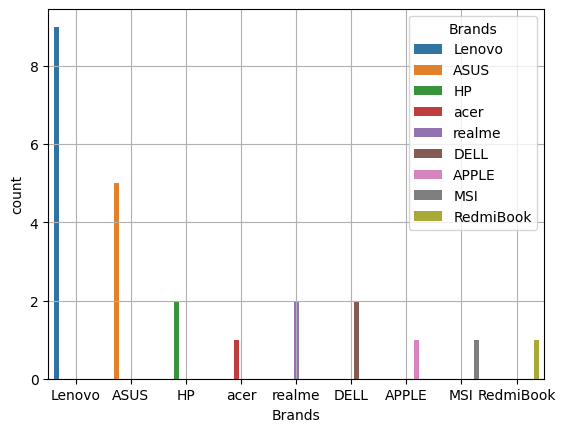

In [40]:
sns.countplot(x = 'Brands', data = df, hue = 'Brands')
plt.grid()

In [41]:
p1 = df.groupby('Brands')['Act_rate','Disc_rate'].agg(['max']) 
p1

C:\Users\AASIF HP\AppData\Local\Temp\ipykernel_10892\41030044.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  p1 = df.groupby('Brands')['Act_rate','Disc_rate'].agg(['max'])


,Act_rate,Disc_rate
,max,max
Brands,,
APPLE,99900,86990
ASUS,78990,49990
DELL,61202,42490
HP,56260,44990
Lenovo,195890,144990
MSI,72990,47990
RedmiBook,59999,38990
acer,42999,26990


<Figure size 900x400 with 0 Axes>

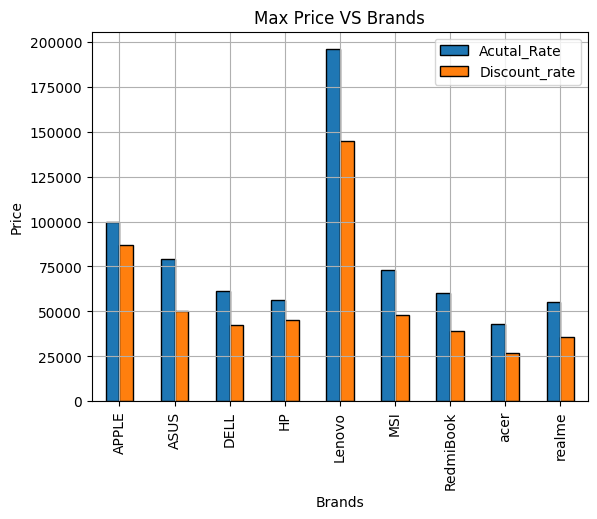

In [42]:
plt.figure(figsize = (9,4))
p1.plot(kind = 'bar', edgecolor = 'black')
plt.title('Max Price VS Brands')
plt.ylabel('Price')
plt.legend(['Acutal_Rate','Discount_rate'])
plt.grid()

In [43]:
p2 = df.groupby('Brands')['Act_rate','Disc_rate'].agg(['min']) 
p2

C:\Users\AASIF HP\AppData\Local\Temp\ipykernel_10892\3858546362.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  p2 = df.groupby('Brands')['Act_rate','Disc_rate'].agg(['min'])


,Act_rate,Disc_rate
,min,min
Brands,,
APPLE,99900,86990
ASUS,33990,23990
DELL,58489,39990
HP,47206,37990
Lenovo,38000,18990
MSI,72990,47990
RedmiBook,59999,38990
acer,42999,26990


<Figure size 900x400 with 0 Axes>

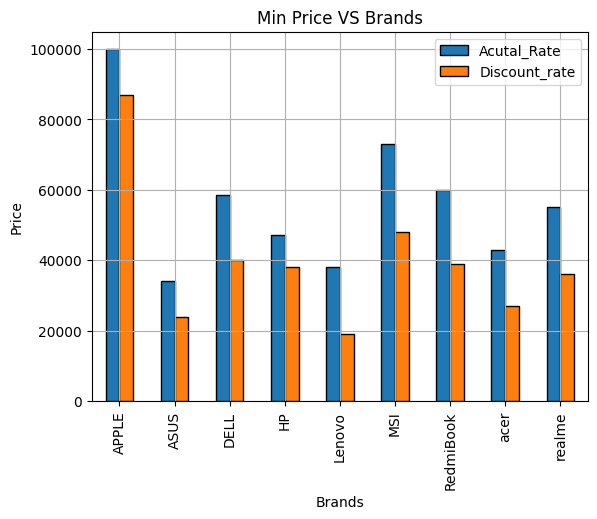

In [44]:
plt.figure(figsize = (9,4))
p2.plot(kind = 'bar', edgecolor = 'black')
plt.title('Min Price VS Brands')
plt.ylabel('Price')
plt.legend(['Acutal_Rate','Discount_rate'])
plt.grid()

In [45]:
p3 = df.groupby(['Brands'])['Num_Review','Num_rating'].agg(['min'])
p3

C:\Users\AASIF HP\AppData\Local\Temp\ipykernel_10892\2914613025.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  p3 = df.groupby(['Brands'])['Num_Review','Num_rating'].agg(['min'])


,Num_Review,Num_rating
,min,min
Brands,,
APPLE,793,8843
ASUS,26,257
DELL,11,130
HP,14,77
Lenovo,0,8
MSI,297,2224
RedmiBook,459,3918
acer,72,367


<Figure size 900x400 with 0 Axes>

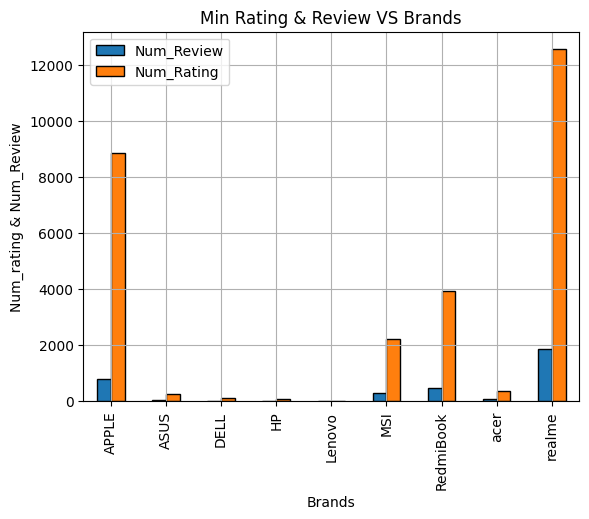

In [46]:
plt.figure(figsize = (9,4))
p3.plot(kind = 'bar', edgecolor = 'black')
plt.title('Min Rating & Review VS Brands')
plt.ylabel('Num_rating & Num_Review')
plt.legend(['Num_Review','Num_Rating'])
plt.grid()

In [47]:
p4 = df.groupby(['Brands'])['Num_Review','Num_rating'].agg(['max'])
p4

C:\Users\AASIF HP\AppData\Local\Temp\ipykernel_10892\3634886127.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  p4 = df.groupby(['Brands'])['Num_Review','Num_rating'].agg(['max'])


,Num_Review,Num_rating
,max,max
Brands,,
APPLE,793,8843
ASUS,1040,10406
DELL,40,440
HP,157,1762
Lenovo,227,2634
MSI,297,2224
RedmiBook,459,3918
acer,72,367


<Figure size 900x400 with 0 Axes>

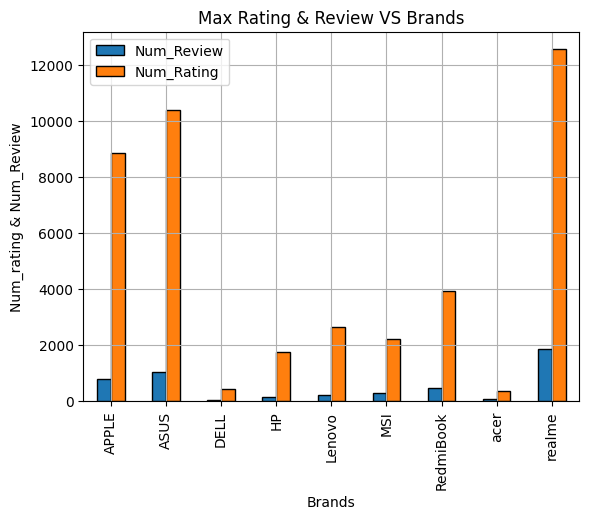

In [48]:
plt.figure(figsize = (9,4))
p4.plot(kind = 'bar', edgecolor = 'black')
plt.title('Max Rating & Review VS Brands')
plt.ylabel('Num_rating & Num_Review')
plt.legend(['Num_Review','Num_Rating'])
plt.grid()
plt.show()

In [49]:
p5 = df.groupby(['Brands'])['Star_rating','Disount%'].agg(['max'])
p5

C:\Users\AASIF HP\AppData\Local\Temp\ipykernel_10892\647501289.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  p5 = df.groupby(['Brands'])['Star_rating','Disount%'].agg(['max'])


,Star_rating,Disount%
,max,max
Brands,,
APPLE,4.7,12.0
ASUS,4.4,36.0
DELL,4.2,31.0
HP,4.3,20.0
Lenovo,4.7,50.0
MSI,4.4,34.0
RedmiBook,4.1,35.0
acer,4.2,37.0


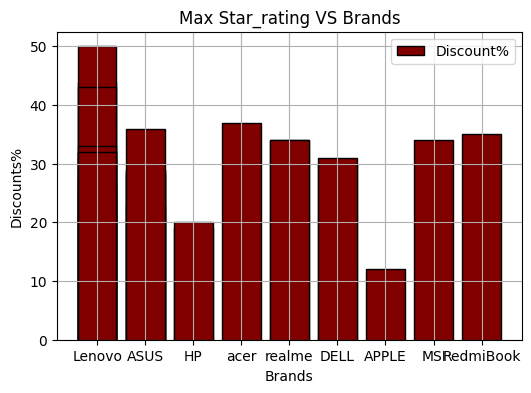

In [50]:
plt.figure(figsize = (6,4))
plt.bar(df['Brands'], df['Disount%'], edgecolor = 'black', color = 'maroon')
plt.title('Max Star_rating VS Brands')
plt.legend(['Discount%'])
plt.xlabel('Brands')
plt.ylabel('Discounts%')
plt.grid()
plt.show()